# Individual Final Project

In [34]:
# Import the appropriate libraries

import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
%matplotlib inline

In [35]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
# import the dataset from Kaggle website. It was first csv file then I convert it to excel file
df = pd.read_excel('supermarket_sales - 0772934.xlsx', sheet_name='Sheet1')

In [37]:
# Check the shape
df.shape


(1000, 16)

In [38]:
# Use the head function
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Invoice Date,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [39]:
#using the info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Invoice Date             1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

In [40]:
#checking isnull
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Invoice Date               0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

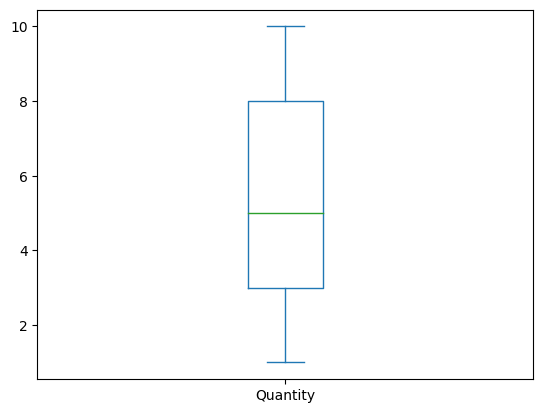

In [41]:
# Create a box plot to identify outliers
ax = df['Quantity'].plot.box()


In [42]:
# Filter out the negative quantity orders
df = df.loc[df['Quantity']>0]

In [43]:
# Check the shape again
df.shape

(1000, 16)

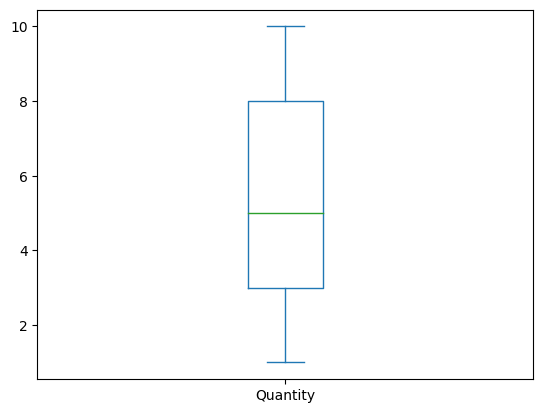

In [44]:
# Create a Box plot without negative quantity
ax = df['Quantity'].plot.box()

# Time Series Trends

- Number of customer

- Revenue

In [45]:
# resample function resamples the data and converts the data into the desired 
# Summarize the data on a monthly basis 
m_orders_df = df.set_index('Invoice Date')['Invoice ID'].resample('M').nunique()

In [46]:
m_orders_df

Invoice Date
2019-01-31    352
2019-02-28    303
2019-03-31    345
Freq: M, Name: Invoice ID, dtype: int64

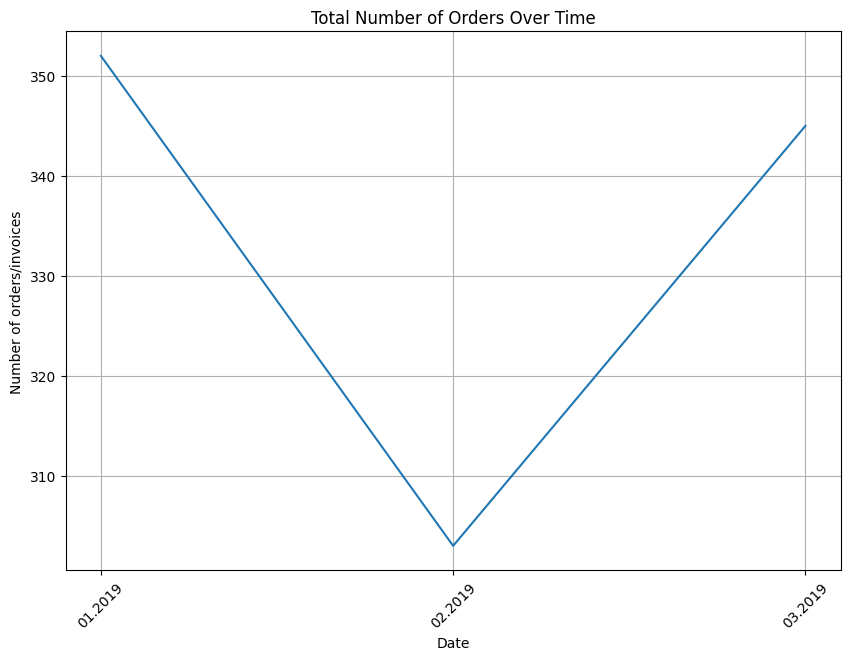

In [47]:
# Create a Line Chart for the data 
ax = pd.DataFrame(m_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('Date')
ax.set_ylabel('Number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

# use x.strftime('%m.%Y'), where x is the Pythondate object, %m is the placeholder for
# the month value, and %Y is the placeholder for the year value. The strftime function
# of the Pythondate object formats the date into the given format.

plt.xticks(
    range(len(m_orders_df.index)), 
    [x.strftime('%m.%Y') for x in m_orders_df.index], 
    rotation=45
)

plt.show()

In [48]:
# Get all invoice dates from Jan 1, 2019 
invoice_dates = df.loc[
    df['Invoice Date'] >= '2019-01-01',
    'Invoice Date'
]

In [49]:
# Print Min and Max dates in that series
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2019-01-01 10:39:00
Max date: 2019-03-30 20:37:00


### Q. What do you observe?

Here, we can see that in the beginning month of Jan the number of order was nearly 360 but, later it fell down by 50 in the next month will, in the month of March it raised to somewhat 330.

In [50]:
# Calculate sales
df['Sales'] = df['Quantity'] * df['Unit price']

# Look at monthly revenue data by using sum as an aggregate function
m_revenue_df = df.set_index('Invoice Date')['Sales'].resample('M').sum()

In [51]:
m_revenue_df

Invoice Date
2019-01-31    110754.16
2019-02-28     92589.88
2019-03-31    104243.34
Freq: M, Name: Sales, dtype: float64

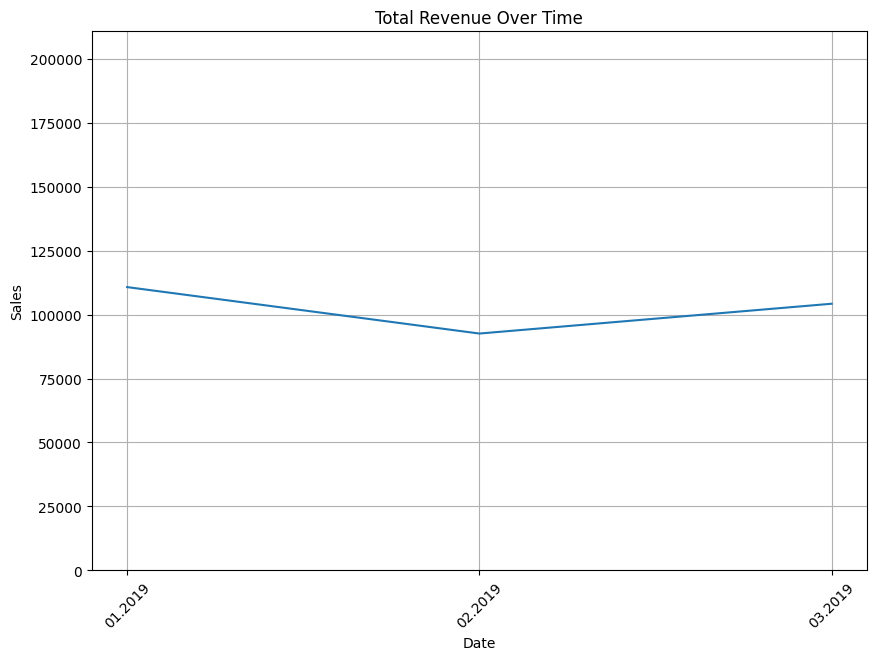

In [52]:
# Create a Line Plot for revenue
ax = pd.DataFrame(m_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(m_revenue_df.values)+100000])

plt.xticks(
    range(len(m_revenue_df.index)),
    [x.strftime('%m.%Y') for x in m_revenue_df.index],
    rotation=45
)
plt.show()

###  Do you see a similar pattern with the order by month line chart? Comment

From the chart we can see that the sales was dropped in Feb 2019 for around 40,000 sales  but, later it increased in the next month that is March 2019.

In [53]:
# Run the head function on  the original dataframe
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Invoice Date,Payment,cogs,gross margin percentage,gross income,Rating,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 10:29:00,Cash,76.40,4.761905,3.8200,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,604.17


In [54]:
# Run the tail function on the original dataframe
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Invoice Date,Payment,cogs,gross margin percentage,gross income,Rating,Sales
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,40.35
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09 13:22:00,Cash,31.84,4.761905,1.5920,7.7,31.84
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22 15:33:00,Cash,65.82,4.761905,3.2910,4.1,65.82
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18 13:28:00,Cash,618.38,4.761905,30.9190,6.6,618.38


# Calculate the repeat customers

In [55]:
# Aggregate the raw data for each Invoice ID.
invoice_df = df.groupby(
    by=['Invoice ID', 'Invoice Date']
).agg({
    'Sales': sum,
    'Rating': max,
    'City': sum,
}).reset_index()

In [56]:
invoice_df.head()

,Invoice ID,Invoice Date,Sales,Rating,City
0,101-17-6199,2019-03-13 19:44:00,320.53,7.0,Yangon
1,101-81-4070,2019-01-17 12:36:00,125.64,4.9,Naypyitaw
2,102-06-2002,2019-03-20 17:52:00,126.25,6.1,Naypyitaw
3,102-77-2261,2019-03-05 18:02:00,457.17,4.2,Naypyitaw
4,105-10-6182,2019-02-27 12:22:00,42.96,6.6,Yangon


In [57]:
# Aggregate by month
#Group by Month and Rating. 
# Filter selects customers who have more than one record in the group
# Basically customers with more than one order in a month

m_repeat_customers_df = invoice_df.set_index('Invoice Date').groupby([
    pd.Grouper(freq='M'), 'Rating'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['Rating']

In [58]:
m_repeat_customers_df

Invoice Date
2019-01-31    58
2019-02-28    60
2019-03-31    60
Freq: M, Name: Rating, dtype: int64

In [59]:
# Calculate the unique customers
m_unique_customers_df = df.set_index('Invoice Date')['Rating'].resample('M').nunique()

In [60]:
m_unique_customers_df

Invoice Date
2019-01-31    60
2019-02-28    61
2019-03-31    61
Freq: M, Name: Rating, dtype: int64

In [61]:
# Compare the repeat and unique customers by month and calculate percentage by month
m_repeat_percentage = m_repeat_customers_df/m_unique_customers_df*100.0
m_repeat_percentage

Invoice Date
2019-01-31    96.666667
2019-02-28    98.360656
2019-03-31    98.360656
Freq: M, Name: Rating, dtype: float64

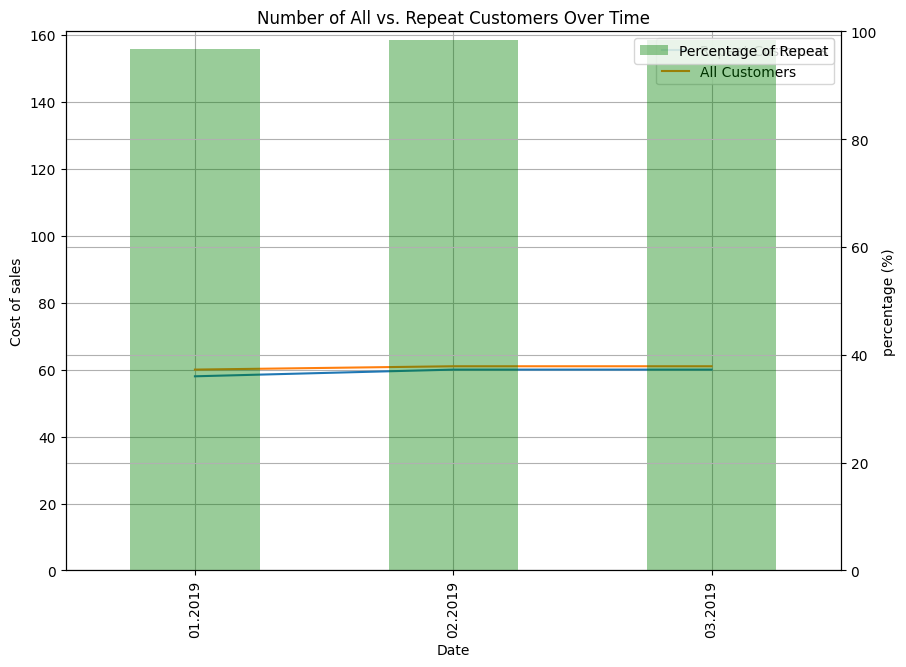

In [62]:
# Visualize thsese two in a dual axis chart

plot1 = pd.DataFrame(m_repeat_customers_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_unique_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_repeat_percentage.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True,# for dual axis with different scale
    color='green',
    alpha=0.4
)

plot1.set_xlabel('Date')
plot1.set_ylabel('Cost of sales')
plot1.set_title('Number of All vs. Repeat Customers Over Time')

plot2.set_ylabel('percentage (%)')

plot1.legend(['Repeat Customers', 'All Customers'])
plot2.legend(['Percentage of Repeat'], loc='upper right')

plot1.set_ylim([0, m_unique_customers_df.values.max()+100])
plot2.set_ylim([0, 100])

plt.xticks(
    range(len(m_repeat_customers_df.index)), 
    [x.strftime('%m.%Y') for x in m_repeat_customers_df.index], 
    rotation=45
)
plt.show()

### Q. Comment on the distribution

### Total customers and returning customers are almost same throughout the 3 months. This means that new customers are added in his year and new customers are making purchases over several months.

In [63]:
# Calculate Monthly revenue of repeat customers
m_rev_repeat_customers_df = invoice_df.set_index('Invoice Date').groupby([
    pd.Grouper(freq='M'), 'Rating'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']


# Calculate and show the % of revenue for repeat and all customers by month
m_rev_perc_repeat_customers_df = m_rev_repeat_customers_df/m_revenue_df * 100.0

<ipython-input-63-2ac15cc2b5d5>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']


In [64]:
m_rev_repeat_customers_df

Invoice Date
2019-01-31    110580.05
2019-02-28     92537.53
2019-03-31    103683.00
Freq: M, Name: Sales, dtype: float64

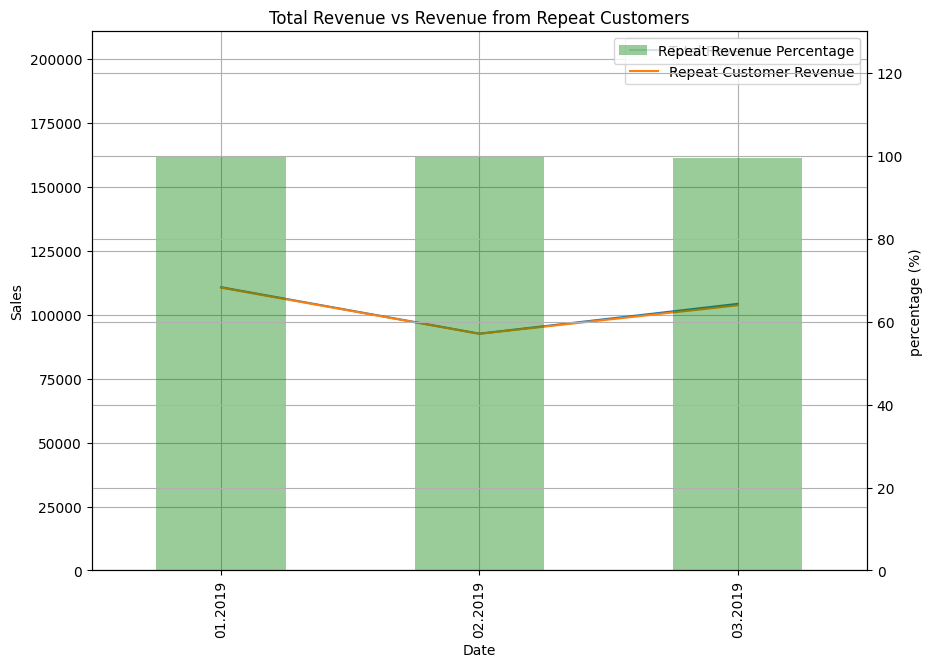

In [65]:
# Plot the  chart for Revenue and % (Dual axis chart)
plot1 = pd.DataFrame(m_revenue_df.values).plot(
    figsize=(10,7))

pd.DataFrame(m_rev_repeat_customers_df.values).plot(
    ax=plot1,
    grid=True
)

plot2 = pd.DataFrame(m_rev_perc_repeat_customers_df.values).plot.bar(
    ax=plot1,
    grid=True,
    secondary_y=True, # for dual axis with different scale
    color='green',
    alpha=0.4
)
plot1.set_xlabel('Date')
plot1.set_ylabel('Sales')
plot1.set_title('Total Revenue vs Revenue from Repeat Customers')

plot1.legend(['Total Revenue', 'Repeat Customer Revenue'])

plot1.set_ylim([0, max(m_revenue_df.values)+100000])

plot2.set_ylim([0, max(m_rev_perc_repeat_customers_df.values)+30])
plot2.set_ylabel('percentage (%)')
plot2.legend(['Repeat Revenue Percentage'])

plot2.set_xticklabels([
    x.strftime('%m.%Y') for x in m_rev_perc_repeat_customers_df.index
])

plt.show()

### Q. Comment on the distribution

### There is a direct relationship between total sales and repeat customer sales. Here, the repeat customers went down in Feb month by almost 20% but later it increased to around 65% in march month. 

# Exploratory Data Analysis (EDA)

### Histogram

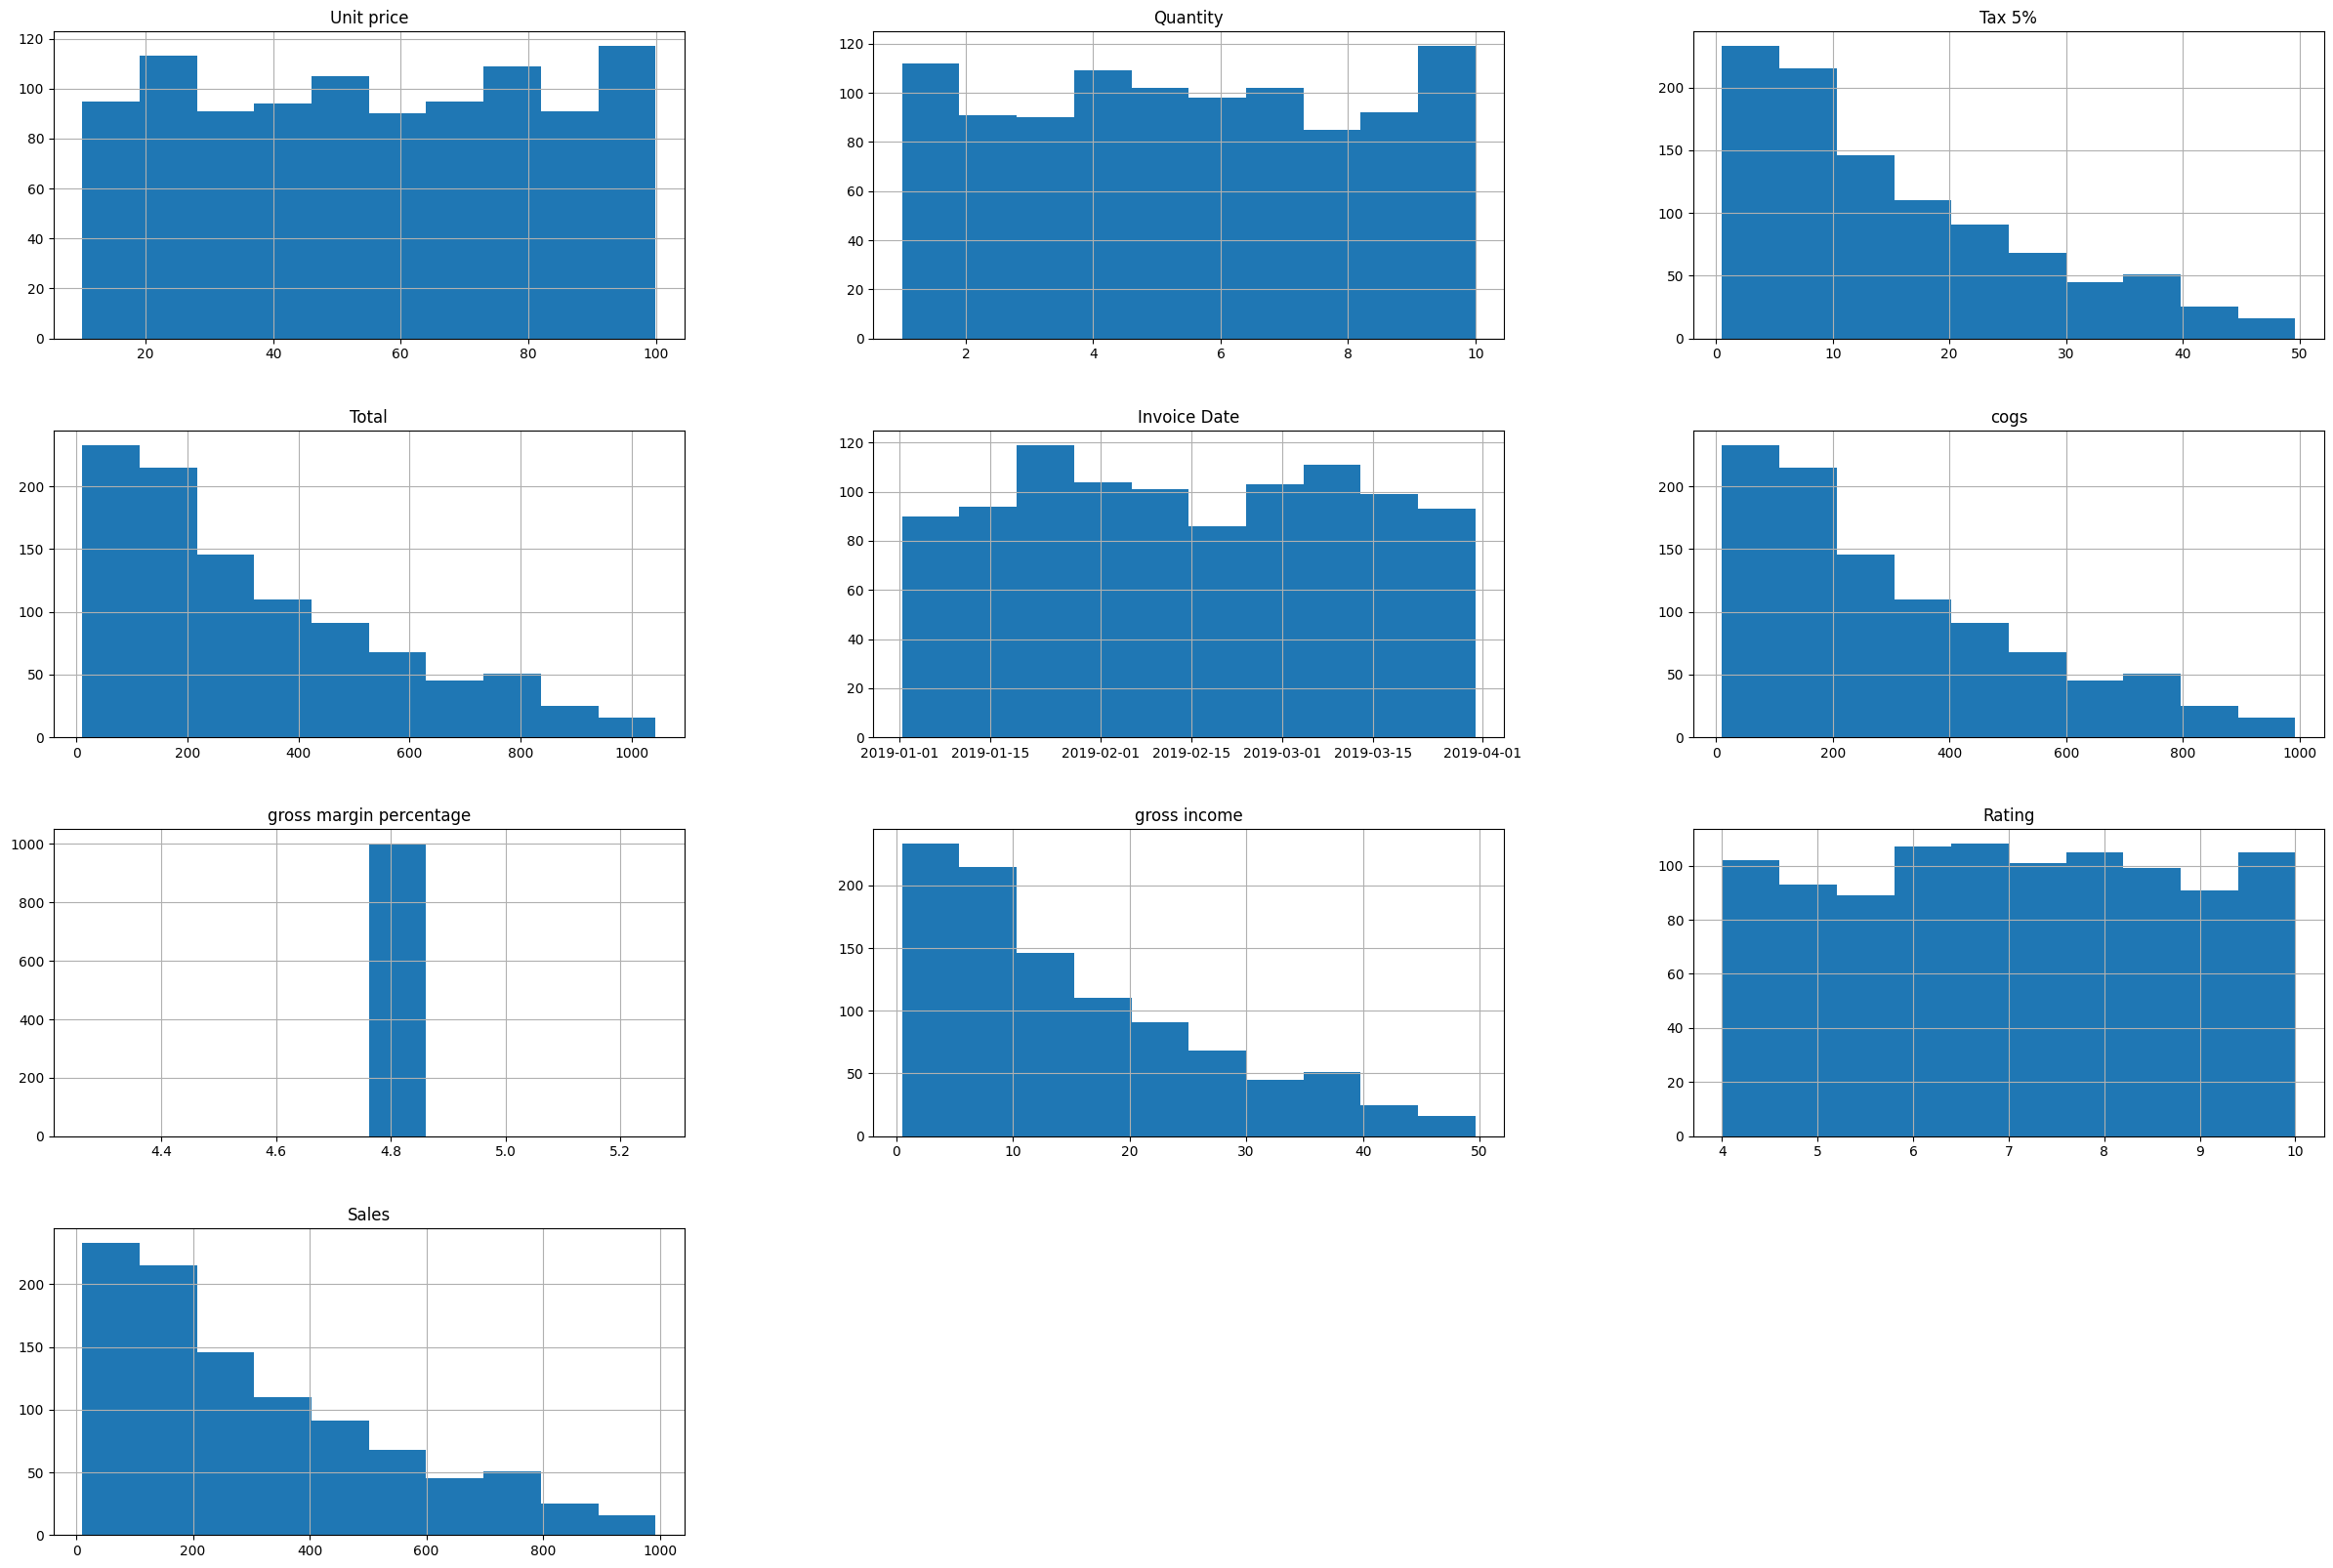

In [66]:
df.hist(figsize=(30,20))
plt.show()

### Heatmap

<ipython-input-67-fdef6aaaf4a8>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True)


<Axes: >

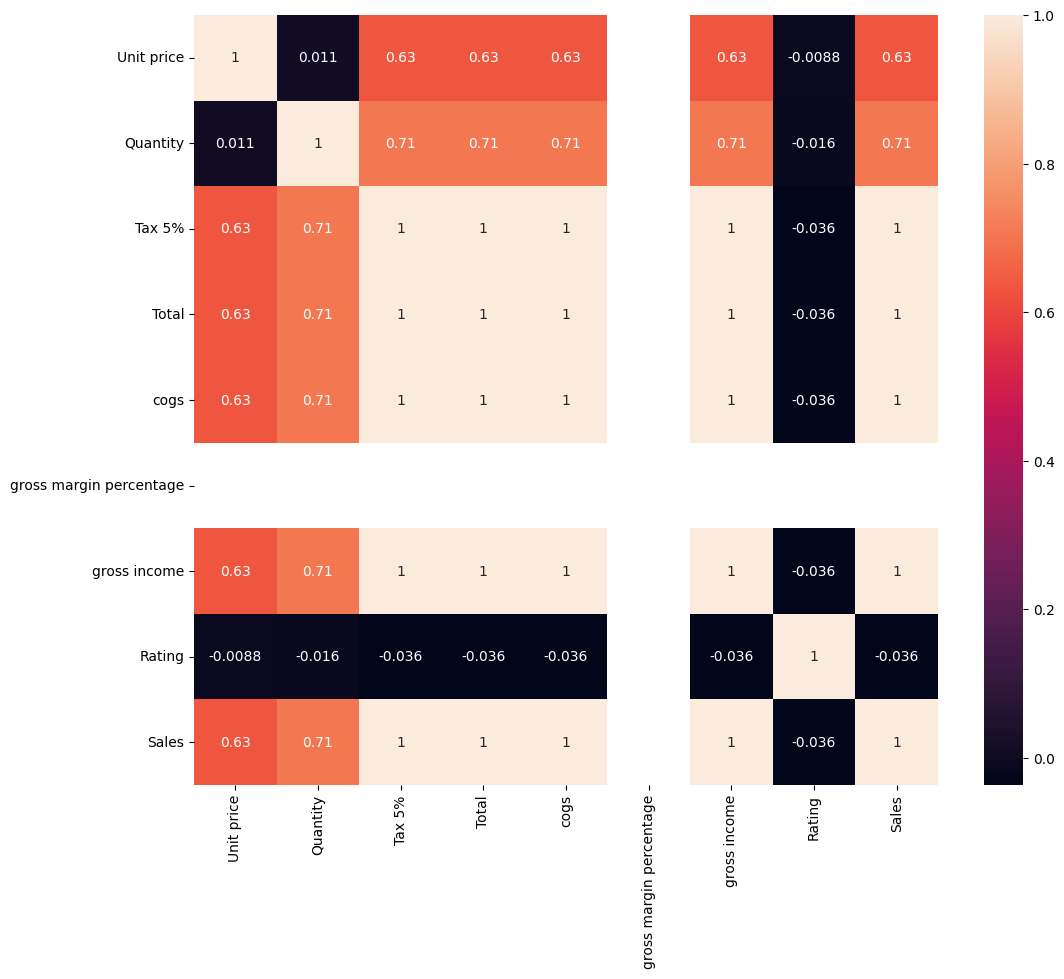

In [67]:
#Heatmap of all the columns
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True)

### Boxplot

<Axes: xlabel='gross income'>

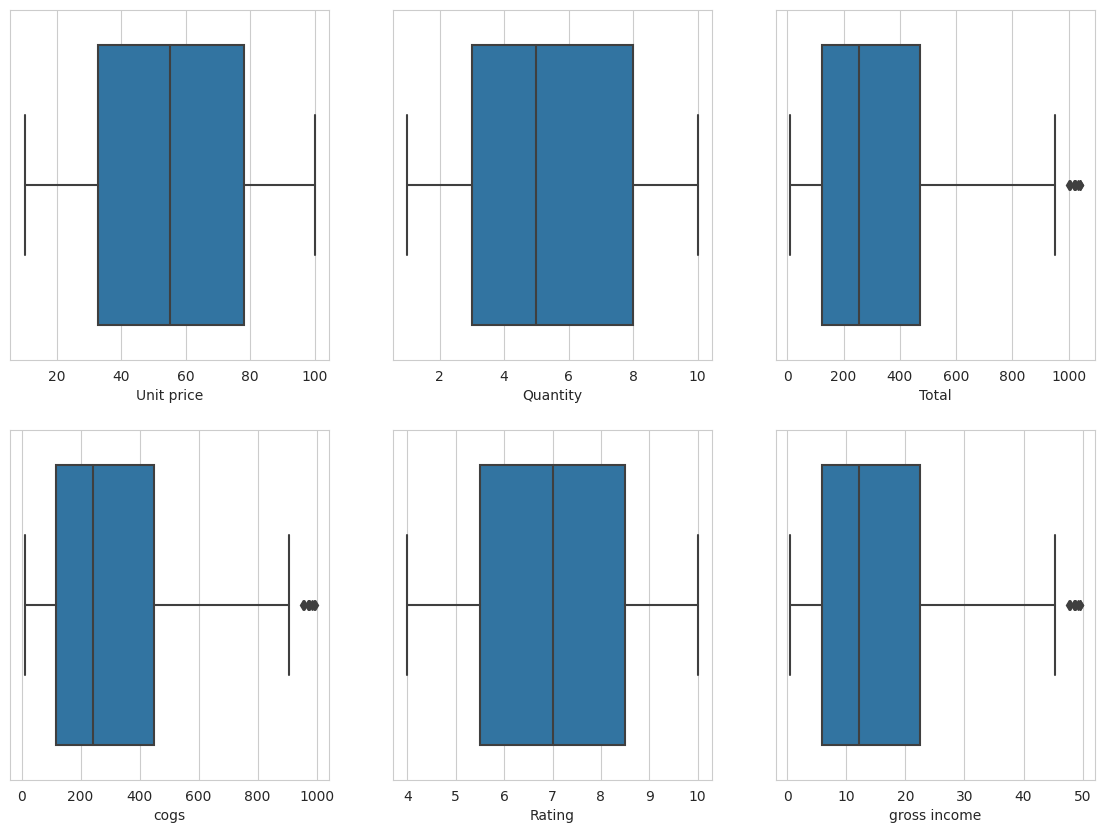

In [68]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=df)

### Barplot

<Axes: xlabel='Product line', ylabel='count'>

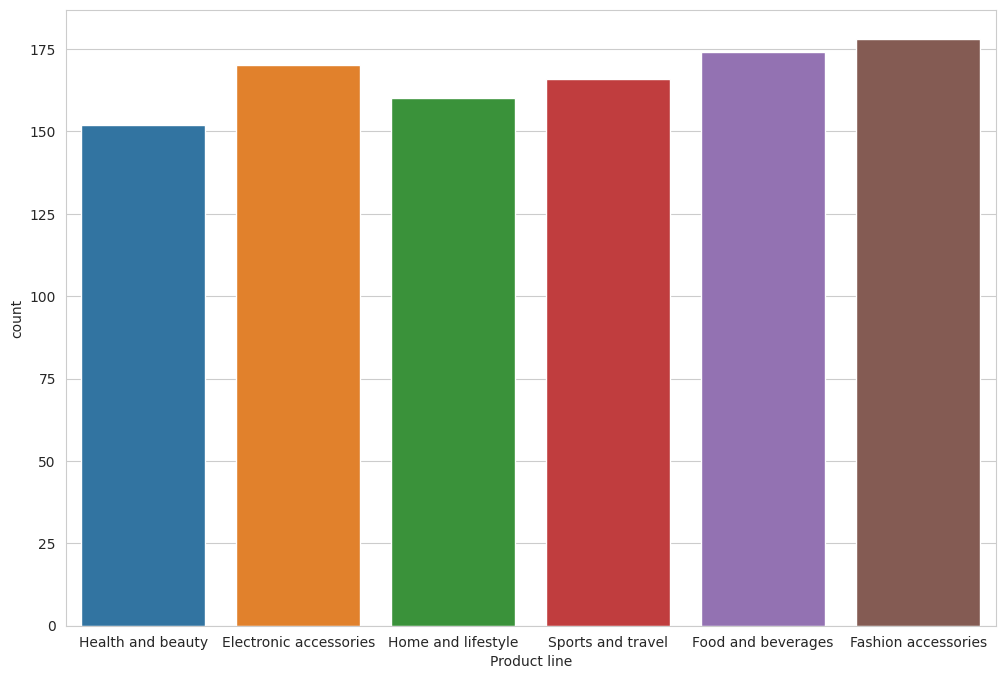

In [69]:
# Countplot
plt.figure(figsize=(12,8))
sns.countplot(x='Product line',data=df)

### So, here Fashion accessories was most sale by the customers compare to Home & lifestyle and Sports & travel while, Electronic accessories as well as Food and beverages was almost same whereas, Health & beauty was least opted by the customers.

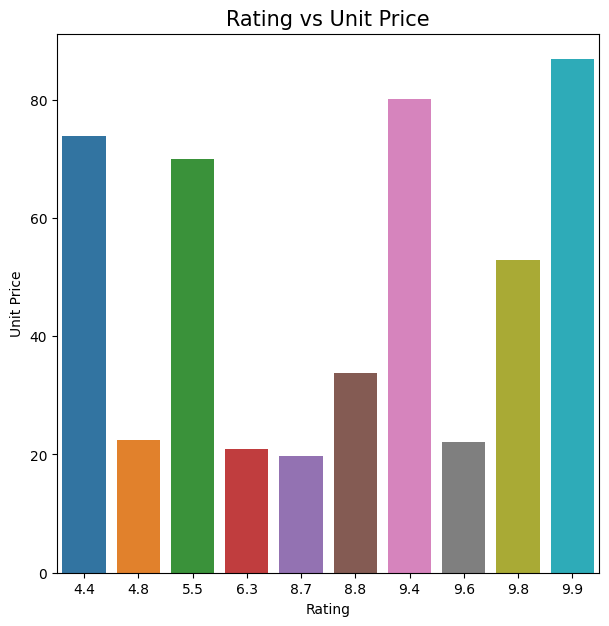

In [70]:
plt.style.use("default")
plt.figure(figsize=(7,7))
sns.barplot(x="Rating", y="Unit price", data=df[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

# Let's find the number of unique values in columns with object datatype

In [71]:
categorical_columns = [cname for cname in df.columns if df[cname].dtype == "object"]

In [72]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [73]:
print("# unique values in Branch: {0}".format(len(df['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(df['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(df['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(df['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(df['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(df['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


# Branch Type Analysis

Text(0.5, 1.0, 'Ratings by Branch')

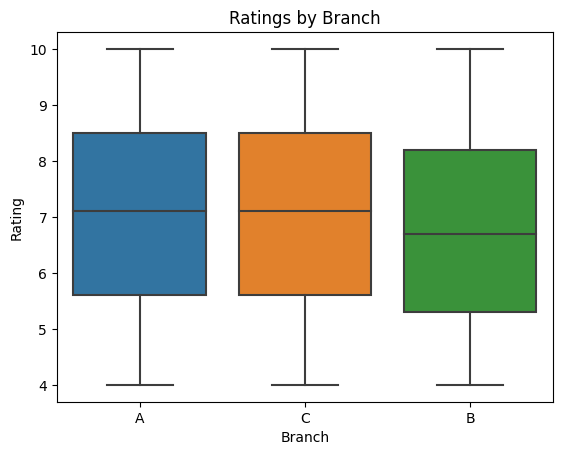

In [74]:
 sns.boxplot(x="Branch", y = "Rating" ,data =df).set_title("Ratings by Branch") 

### Here, we can see that Branch B has the lowest rating among all the branches.

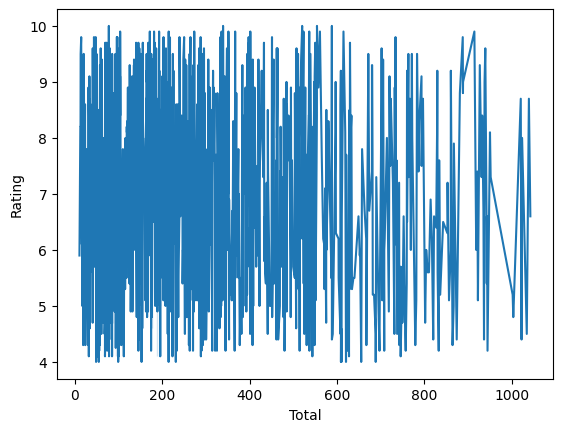

In [75]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data = df)

### Here, is the graph of total vs rating which shows that how much rating has been given by the customers.

# Product Analysis

### Let's look at the various products' performance.

<Axes: xlabel='Quantity', ylabel='Product line'>

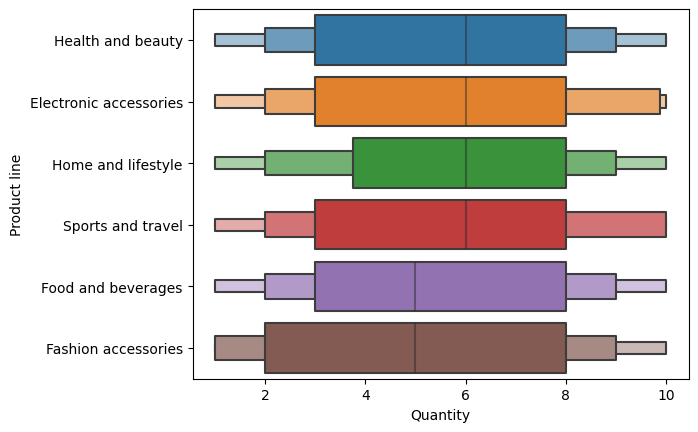

In [76]:
sns.boxenplot(x = 'Quantity', y = 'Product line', data=df )

### Of the visuals above, Health & Beauty, Electronic Accessories, Home & Lifestyle, and Sports & Travel have higher average sales than Food & Beverage and Fashion Accessories.

<Axes: xlabel='count', ylabel='Product line'>

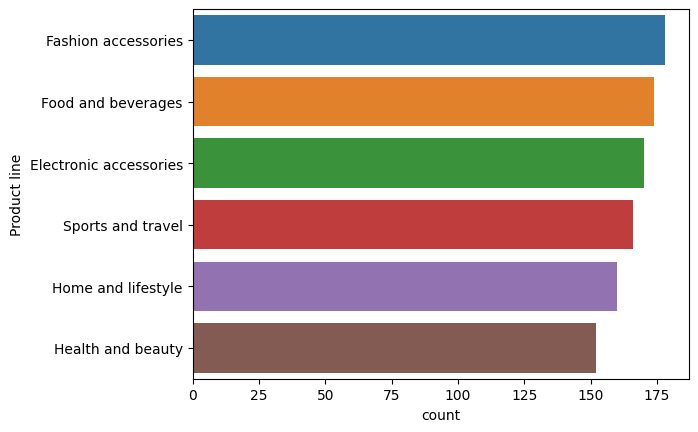

In [77]:
sns.countplot(y = 'Product line', data=df, order = df['Product line'].value_counts().index )

### The image above shows the top product types sold for a given data set. Fashion accessories are the best, health and beauty are the worst

<Axes: xlabel='Sales', ylabel='Product line'>

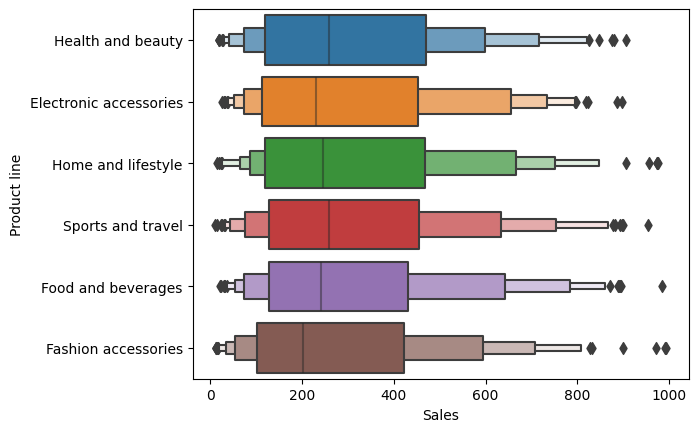

In [78]:
sns.boxenplot(y = 'Product line', x = 'Sales', data=df )

### Food and Drink has the highest average rating, while Sports and Travel have the lowest average rating.

<Axes: xlabel='Total', ylabel='Product line'>

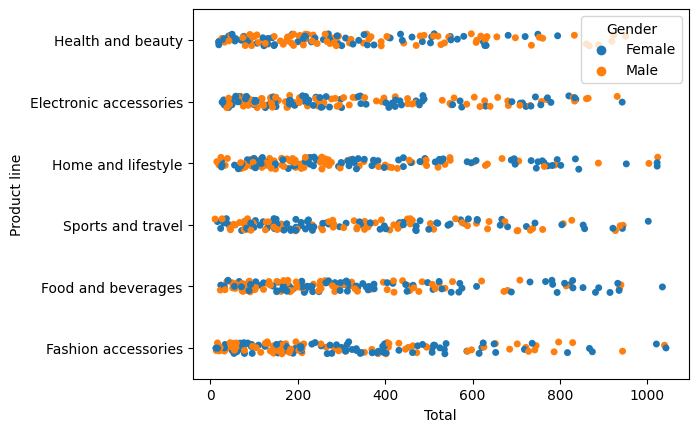

In [79]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=df )

### Here, we can see that the males were more in starting total of sales in product line compare to females.

# Payment Channel

### Let see how customers make payment in this business

Text(0.5, 1.0, 'Payment Channel')

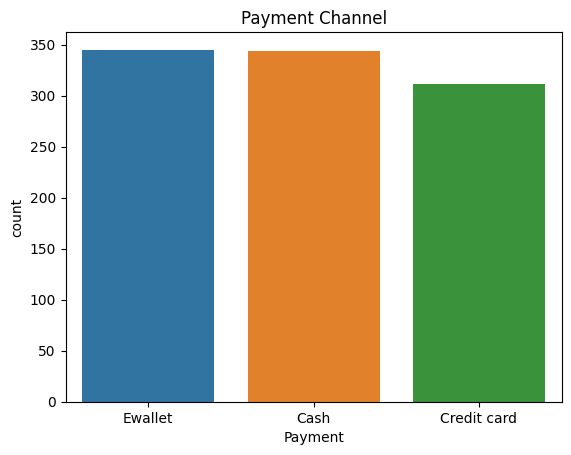

In [80]:
sns.countplot(x="Payment", data =df).set_title("Payment Channel") 

### Most customers pay with E-wallet and cash, but less than 40% pay with credit cards. We also want to see the distribution of this payment type across all branches

Text(0.5, 1.0, 'Payment Channel by Branch')

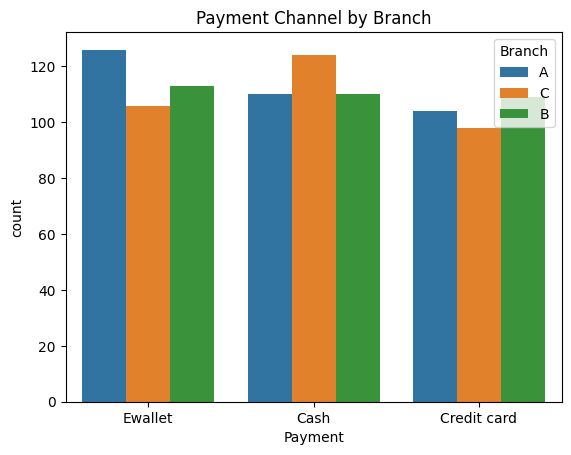

In [81]:
 sns.countplot(x="Payment", hue = "Branch", data =df).set_title("Payment Channel by Branch") 

### Here, Branch C has used more Cash payments ,whereas Branch A has used E-wallet and Branch B has used Credit card for the payments.

# Customer Analysis

### From inspection, there are two types of customers. Members and Normal. Let's see how many they are and where they are

In [82]:
df['Customer type'].nunique()

2

Text(0.5, 1.0, 'Customer Type')

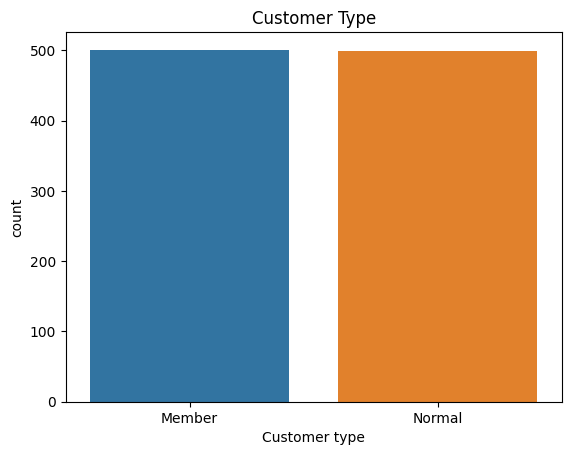

In [83]:
sns.countplot(x="Customer type", data =df).set_title("Customer Type") 

Text(0.5, 1.0, 'Customer Type by Branch')

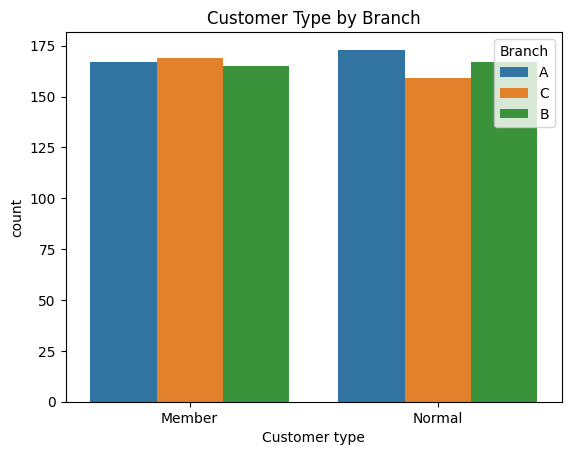

In [84]:
 sns.countplot(x="Customer type", hue = "Branch", data =df).set_title("Customer Type by Branch")

### Here, we can see that Branch A was highest in Normal Customer Type While Branch B stands second and Branch C comes last. However, in Member Customer Type all the three branch were almost same.

# Do the customer type influence customer rating? Let's find out

Text(0.5, 1.0, 'Customer Type')

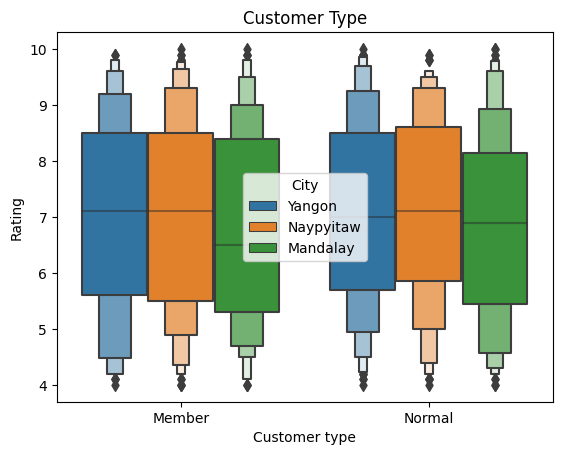

In [85]:
 sns.boxenplot(x="Customer type",  y = "Rating",  hue = "City", data =df).set_title("Customer Type") 

### Here, Yangon & Naypyidaw city customers where average in Member type compare to Mandalay city whereas, Naypyidaw city was more than Yangon city & Mandalay city was least in Normal type for customer ratings.

# Does customer type influences the sales

<Axes: xlabel='Customer type', ylabel='Total'>

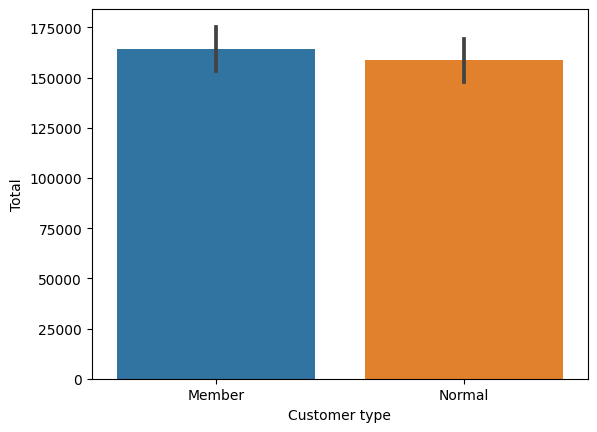

In [86]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=df)

### Yes, we can see that the one who where influence more in sales was Member Type compare to Normal Type.